# Deep Reinforcement Learning: Navigation

---

Project: train an agent to navigate (and collect bananas!) in a large, square world. Navigation is relevant to many technical applications such as robotics, self-driving cars and humanoids.


The task is episodic, and in order to solve the environment, your agent must get an average score of +13 over 100 consecutive episodes. Note: The project environment is similar to, but not identical to the Food Collector environment on the [Unity ML-Agents GitHub page](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#banana-collector). 

# State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

# Submission Checklist 


1. a ***README*** that describes how someone not familiar with this project should use your repository. 

2. the ***code*** that you use for training the agent, along with the trained model weights. 

3. a ***report*** describing your learning algorithm. 


# About the Environment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

# Imports

In [2]:
from unityagents import UnityEnvironment
import numpy as np
from agent import Agent
from utils.utils import plot_scores, learn_to_navigate_for_yellow_bananas
import matplotlib.pyplot as plt
%matplotlib inline

# Vanilla Algorithm (Benchmark)

Using the Vanilla Deeep Q Learning Algorithm implementation developed in Value-Based Methods portion of the DRLND. This will be our baseline, before additional changes are implemented to our model and agent such as:

The DRIVER Code can be found at ```utils/utils.py```

1. Double DQN
2. Prioritized Experience Replay
3. Dueling DQN

The Benchmark Implementation should take around 1800 episodes to reach an average of about 13.0 reward points for the last 100 episode. 

In [3]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name] 

# Stats
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

# Create Agent
agent = Agent(state_size, action_size, seed=0)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Beginning Training....
Episode 100	Average Score: 4.28
Episode 200	Average Score: 8.26
Episode 282	Average Score: 13.04
Environment solved in 282 episodes!	Average Score: 13.04
eps: 0.01
last_score: 14.0
solved_in: 282
last_100_avg: 13.04
save_file: baseline_params.pth


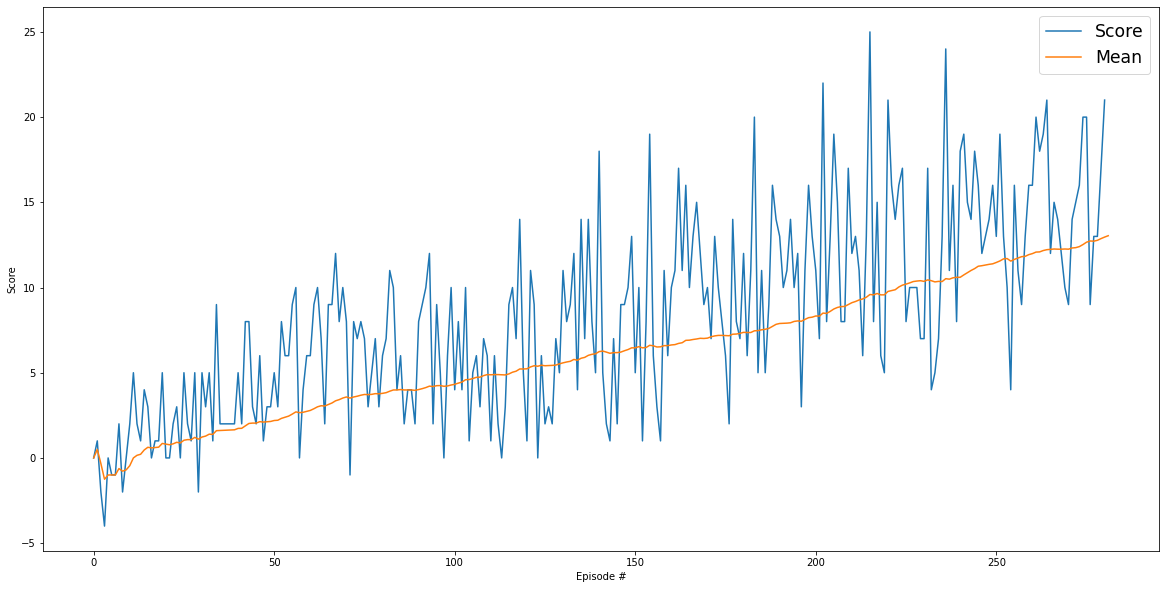

In [4]:
scores, scores_mean, execution_info = learn_to_navigate_for_yellow_bananas(agent,
                                                                           env,
                                                                           brain_name,
                                                                           save_name='baseline_params.pth',
                                                                           max_t=1000,
                                                                           eps_start=0.10, 
                                                                           eps_end=0.01,
                                                                           eps_decay=0.987)
env.close()
plot_scores(scores, scores_mean, execution_info)

# Double DQN Algorithm

Here is the performance of the baseline algorithm in addition to the Double DQN modifications. Let's see how they compare!

In [3]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# Stats
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

# Create Agent , Double DQN
double_agent = Agent(state_size, action_size, seed=0, double_DQN=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Beginning Training....
Episode 100	Average Score: 3.53
Episode 200	Average Score: 7.93
Episode 300	Average Score: 12.47
Episode 311	Average Score: 13.03
Environment solved in 311 episodes!	Average Score: 13.03
eps: 0.01
last_score: 18.0
solved_in: 311
last_100_avg: 13.03
save_file: DDQN_params.pth


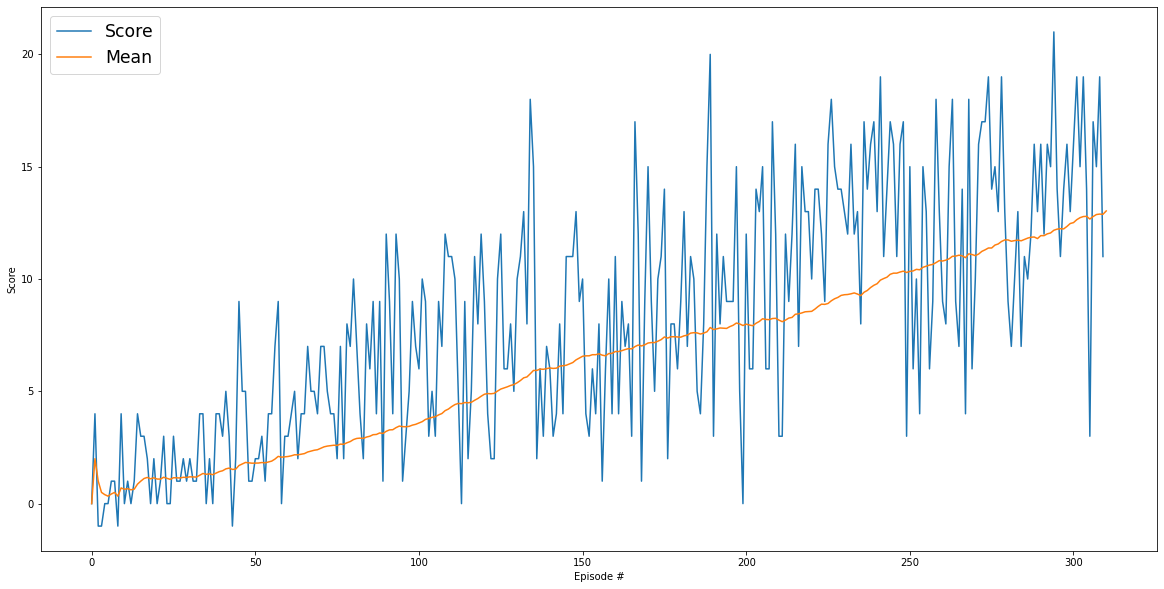

In [4]:
scores, scores_mean, execution_info = learn_to_navigate_for_yellow_bananas(double_agent,
                                                                           env,
                                                                           brain_name,
                                                                           save_name='DDQN_params.pth',
                                                                           max_t=1000,
                                                                           eps_start=0.10, 
                                                                           eps_end=0.01,
                                                                           eps_decay=0.987)
env.close()
plot_scores(scores, scores_mean, execution_info)

# Prioritized Experience Replay DQN Algorithm

Here is the performance of the baseline algorithm in addition to the Prioritized Experience Replay modifications. Let's see how they compare!

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from agent import Agent
from utils.utils import plot_scores, learn_to_navigate_for_yellow_bananas
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# Stats
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

# Create Agent , Double DQN
PER_agent = Agent(state_size, action_size, seed=0, double_DQN=False, prioritized_replay=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Beginning Training....
Episode 100	Average Score: 5.42
Episode 200	Average Score: 10.18
Episode 300	Average Score: 11.88
Episode 328	Average Score: 13.14
Environment solved in 328 episodes!	Average Score: 13.14
eps: 0.01
last_score: 19.0
solved_in: 328
last_100_avg: 13.14
save_file: PER_params.pth


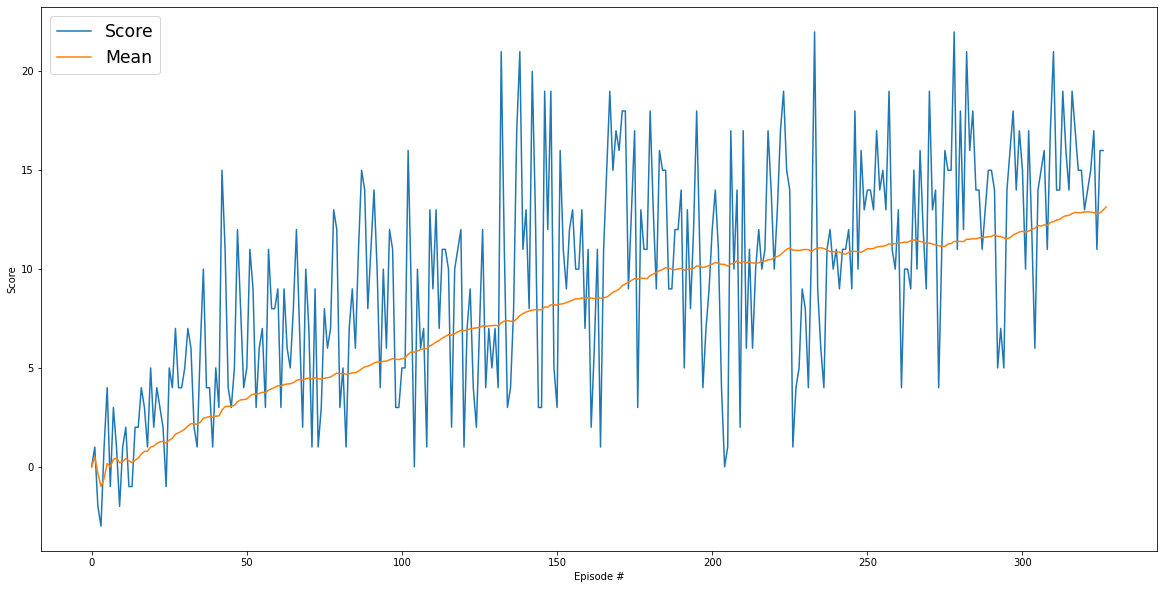

In [2]:
scores, scores_mean, execution_info = learn_to_navigate_for_yellow_bananas(PER_agent,
                                                                           env,
                                                                           brain_name,
                                                                           save_name='PER_params.pth',
                                                                           max_t=1000,
                                                                           eps_start=0.10, 
                                                                           eps_end=0.01,
                                                                           eps_decay=0.987)
env.close()
plot_scores(scores, scores_mean, execution_info)

# Dueling DQN Algorithm

Here is the performance of the baseline algorithm in addition to the Dueling Networks modifications. Let's see how they compare!

In [2]:
from unityagents import UnityEnvironment
import numpy as np
from agent import Agent
from utils.utils import plot_scores, learn_to_navigate_for_yellow_bananas
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# Stats
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

# Create Agent , Double DQN
dueling_agent = Agent(state_size, 
              action_size, 
              seed=0, 
              double_DQN=False, 
              prioritized_replay=False, 
              dueling_networks=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Beginning Training....
Episode 100	Average Score: 4.93
Episode 200	Average Score: 10.14
Episode 300	Average Score: 12.06
Episode 320	Average Score: 13.01
Environment solved in 320 episodes!	Average Score: 13.01
eps: 0.01
last_score: 14.0
solved_in: 320
last_100_avg: 13.01
save_file: dueling_params.pth


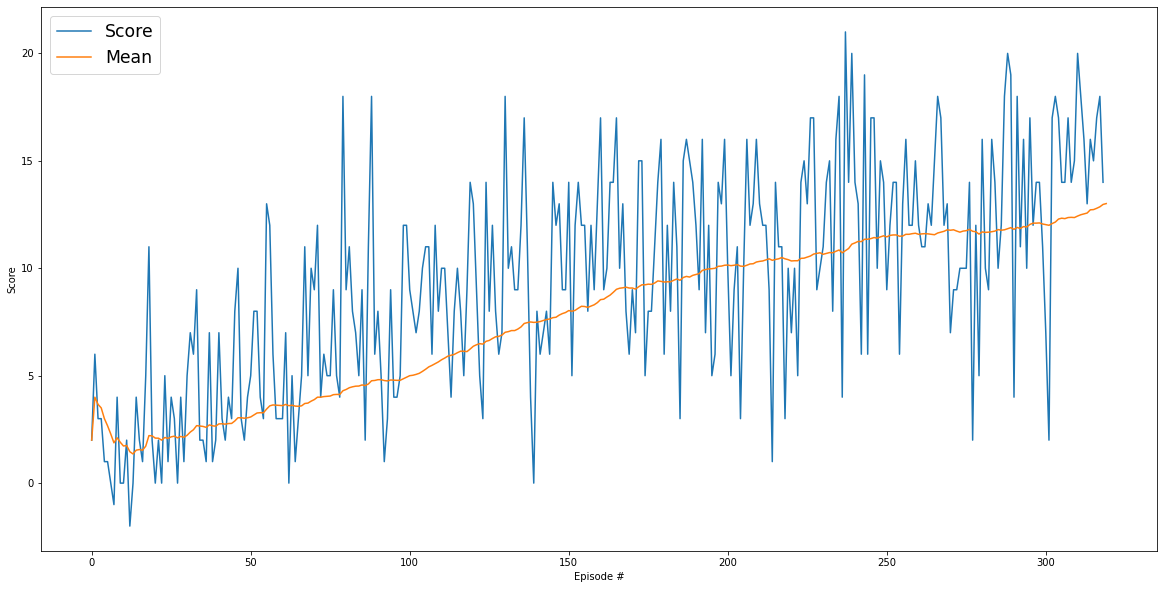

In [3]:
scores, scores_mean, execution_info = learn_to_navigate_for_yellow_bananas(dueling_agent,
                                                                           env,
                                                                           brain_name,
                                                                           save_name='dueling_params.pth',
                                                                           max_t=1000,
                                                                           eps_start=0.10, 
                                                                           eps_end=0.01,
                                                                           eps_decay=0.987)
env.close()
plot_scores(scores, scores_mean, execution_info)

# Mini Rainbow DQN Algorithm

Here is the performance of the baseline algorithm with all three previous modifications. Let's see how they compare!

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from agent import Agent
from utils.utils import plot_scores, learn_to_navigate_for_yellow_bananas
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# Stats
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

# Create Agent , Double DQN
mini_rainbow_agent = Agent(state_size, 
              action_size, 
              seed=0, 
              double_DQN=True, 
              prioritized_replay=True, 
              dueling_networks=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Beginning Training....
Episode 100	Average Score: 5.19
Episode 200	Average Score: 9.21
Episode 300	Average Score: 11.08
Episode 386	Average Score: 13.03
Environment solved in 386 episodes!	Average Score: 13.03
eps: 0.01
last_score: 19.0
solved_in: 386
last_100_avg: 13.03
save_file: mini_rainbow_params.pth


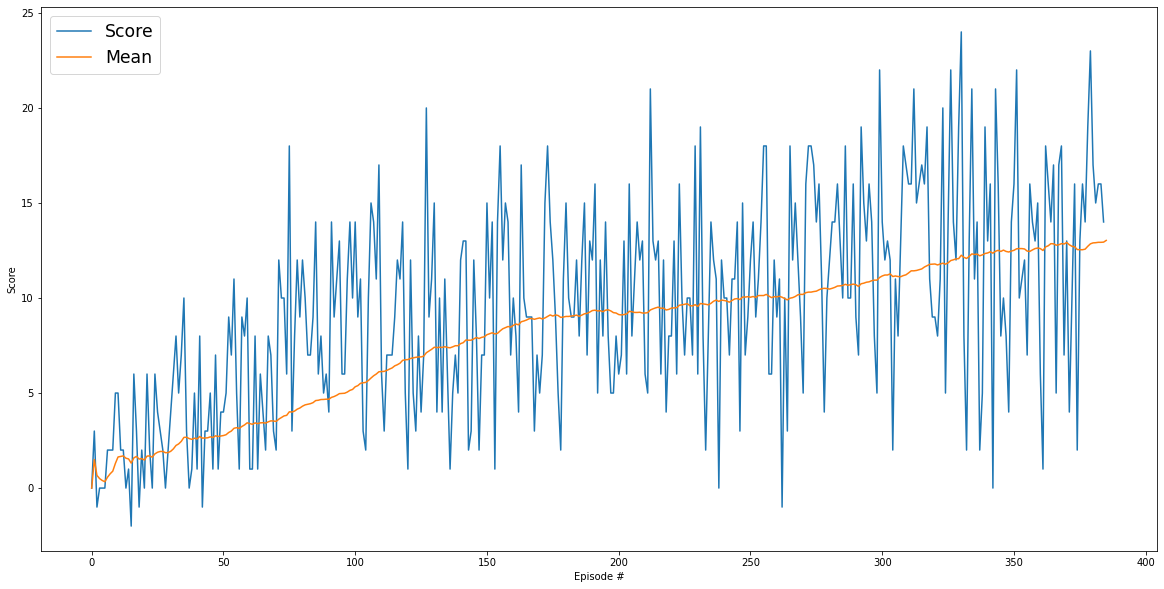

In [2]:
scores, scores_mean, execution_info = learn_to_navigate_for_yellow_bananas(mini_rainbow_agent,
                                                                           env,
                                                                           brain_name,
                                                                           save_name='mini_rainbow_params.pth',
                                                                           max_t=1000,
                                                                           eps_start=0.10, 
                                                                           eps_end=0.01,
                                                                           eps_decay=0.987)
env.close()
plot_scores(scores, scores_mean, execution_info)

# Testing Framework

Load in the custom saved parameters and view the agent behave. 

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from agent import Agent
from collections import deque
import torch

In [2]:
# Load Parameter of choice
if torch.cuda.is_available():
    map_location=lambda storage, loc: storage.cuda()
else:
    map_location='cpu'

# Load Unity Environment
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

agent_test = Agent(state_size, action_size, seed=0) # Get agent
checkpoint = torch.load('PER_params.pth', map_location=map_location)
agent_test.qnetwork_local.load_state_dict(checkpoint)


state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent_test.act(state)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Score: 13.0
